In [1]:
import pandas as pd

c:\Users\lukas\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\lukas\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None) 
df_final = pd.read_csv("../../data/F_feature_selection/feature_selection-2023.csv", sep=";")
display(df_final.head())

for col in df_final.columns:
    print(df_final[col].value_counts(dropna=False))

print(df_final.columns)

,location,type_of_collision,latitude,longitude,reserved_lane_present,horizontal_alignment,infrastructure,accident_situation,speed_limit,position,sex,pedestrian_location,pedestrian_action,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,fixed_obstacle_struck_other,mobile_obstacle_struck_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler,hour_sin,hour_cos,time_of_day,day_of_week,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_of_year_sin,day_of_year_cos,age,age_group,used_belt,used_helmet,used_child_restraint,used_airbag,vehicle_category_simplified,impact_score,vehicle_category_simplified_other,impact_score_other,impact_delta,road_complexity_index,surface_quality_indicator,role,lighting_ordinal,weather_ordinal,injury_target
0,2,7,48.866386,2.323471,0,1,0,1,30,1,1,-1,-1,0,0,5,1,1,-1,-1,-1,-1,-1,0,0,0,0,0,1,1.000000,6.123234e-17,Morning_Rush,6,-0.781831,0.62349,0.5,-0.866025,0.817401,-0.576069,45,middle_aged,0,1,0,0,powered_2_3_wheeler,3,none,1,2,3.750000,0,driver,0,2,1
1,2,6,48.845478,2.428681,2,1,0,1,50,1,2,-1,-1,0,1,1,1,1,-1,-1,-1,-1,-1,0,0,0,1,0,0,0.965926,2.588190e-01,Night,6,-0.781831,0.62349,0.5,-0.866025,0.817401,-0.576069,26,adult,1,0,0,0,light_motor_vehicle,4,none,1,3,4.166667,0,driver,1,3,0
2,2,6,48.845478,2.428681,2,1,0,1,50,10,1,2,3,-1,-1,-1,-1,-1,0,1,1,1,1,0,0,0,1,0,0,0.965926,2.588190e-01,Night,6,-0.781831,0.62349,0.5,-0.866025,0.817401,-0.576069,26,adult,0,0,0,0,unknown,1,light_motor_vehicle,4,-3,4.166667,0,pedestrian,1,3,2
3,2,1,48.762400,2.406550,0,1,5,1,50,1,1,0,0,0,2,1,16,1,0,2,2,15,1,0,0,0,1,0,1,-0.866025,5.000000e-01,Night,6,-0.781831,0.62349,0.5,-0.866025,0.817401,-0.576069,36,adult,0,1,0,0,powered_2_3_wheeler,3,light_motor_vehicle,4,-1,5.833333,0,driver,0,2,2
4,2,1,48.762400,2.406550,0,1,5,1,50,1,2,0,0,0,2,2,15,1,0,2,1,16,1,0,0,0,1,0,1,-0.866025,5.000000e-01,Night,6,-0.781831,0.62349,0.5,-0.866025,0.817401,-0.576069,39,adult,1,0,0,0,light_motor_vehicle,4,powered_2_3_wheeler,3,1,5.833333,0,driver,0,2,0


location
2    75865
1    49640
Name: count, dtype: int64
type_of_collision
 3    39149
 6    31282
 2    18148
 1    15124
 4     7793
 7     7300
 5     6681
-1       28
Name: count, dtype: int64
latitude
 49.205626    65
 46.734941    54
 48.962220    41
 48.937889    38
 45.237033    36
              ..
 48.631361     1
-20.892190     1
-20.886070     1
 4.940950      1
 45.273376     1
Name: count, Length: 52841, dtype: int64
longitude
6.120265    65
2.791761    54
1.772510    41
2.297667    38
4.618850    36
            ..
6.481700     1
1.808356     1
2.925287     1
4.006448     1
5.777190     1
Name: count, Length: 53082, dtype: int64
reserved_lane_present
 0    109739
 1      6521
 3      4772
 2      4234
-1       239
Name: count, dtype: int64
horizontal_alignment
 1    102753
 2     10801
 3     10459
 4      1487
-1         5
Name: count, dtype: int64
infrastructure
 0    105686
 5      6356
 9      4358
 2      2253
 1      1548
 3      1499
 6      1319
 8      1006
-1    

In [3]:
targets = df_final['injury_target']
df_final.drop(["latitude", 'longitude', 'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'day_of_year_sin', 'day_of_year_cos', 'month_sin', 'month_cos', 'age', 'impact_score', 'impact_score_other', 'injury_target'], axis=1, inplace=True)


In [4]:
for col in df_final.columns:
    print(df_final[col].value_counts(dropna=False))

location
2    75865
1    49640
Name: count, dtype: int64
type_of_collision
 3    39149
 6    31282
 2    18148
 1    15124
 4     7793
 7     7300
 5     6681
-1       28
Name: count, dtype: int64
reserved_lane_present
 0    109739
 1      6521
 3      4772
 2      4234
-1       239
Name: count, dtype: int64
horizontal_alignment
 1    102753
 2     10801
 3     10459
 4      1487
-1         5
Name: count, dtype: int64
infrastructure
 0    105686
 5      6356
 9      4358
 2      2253
 1      1548
 3      1499
 6      1319
 8      1006
-1       934
 4       423
 7       123
Name: count, dtype: int64
accident_situation
 1    107619
 3      6653
 8      3964
 5      2719
 4      2303
 6      1517
 2       727
-1         3
Name: count, dtype: int64
speed_limit
 50     55718
 30     19347
 80     16842
 90     11776
 70      9826
 110     5461
 130     3434
-1       2133
 20       368
 60       283
 40       121
 25       115
 45        26
 100       24
 10        11
 15         6
 75      

### Identifying Numerical, Ordinal, and Categorical Columns

In this step, three groups of features for clustering are defined:

- **`num_cols`**: Numerical variables, including speed limit, vehicle category indicators, road complexity index, and impact delta.
- **`ord_cols`**: Ordinal variables that represent ordered categories (e.g., lighting conditions, weather).
- **`cat_cols`**: All remaining columns that are neither numerical nor ordinal. These are identified programmatically to avoid manual listing.

In [5]:
num_cols = ['speed_limit', 'vehicle_category_involved_bicycle', 'vehicle_category_involved_bus_coach', 'vehicle_category_involved_hgv_truck', 'vehicle_category_involved_light_motor_vehicle', 'vehicle_category_involved_other', 'vehicle_category_involved_powered_2_3_wheeler', 'road_complexity_index', 'impact_delta']
ord_cols = ['lighting_ordinal', 'weather_ordinal']
cat_cols = []
for col in df_final.columns:
    if col not in num_cols and col not in ord_cols:
        cat_cols.append(col)
print(cat_cols)

['location', 'type_of_collision', 'reserved_lane_present', 'horizontal_alignment', 'infrastructure', 'accident_situation', 'position', 'sex', 'pedestrian_location', 'pedestrian_action', 'fixed_obstacle_struck', 'mobile_obstacle_struck', 'initial_point_of_impact', 'main_maneuver_before_accident', 'motor_type', 'fixed_obstacle_struck_other', 'mobile_obstacle_struck_other', 'initial_point_of_impact_other', 'main_maneuver_before_accident_other', 'motor_type_other', 'time_of_day', 'day_of_week', 'age_group', 'used_belt', 'used_helmet', 'used_child_restraint', 'used_airbag', 'vehicle_category_simplified', 'vehicle_category_simplified_other', 'surface_quality_indicator', 'role']


## Preprocessing Components

To properly prepare each feature type, the following scikit-learn transformers are used:

- **OneHotEncoder (`cat_encoder`)**  
  - Used for categorical variables.  
  - `drop="first"` prevents multicollinearity by dropping the first category.  
  - `handle_unknown="ignore"` ensures that unseen categories during inference will not cause errors.

- **OrdinalEncoder (`ord_encoder`)**  
  - Transforms ordered categories (e.g., weather, lighting) into integer rankings while preserving order relations.

- **StandardScaler (`num_scaler` & `ord_scaler`)**  
  - Scales numerical and ordinal features to have mean 0 and standard deviation 1.  
  - Ensures that all features contribute equally to distance-based algorithms like K-Means.


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cat_encoder = OneHotEncoder(drop="first", handle_unknown="ignore")
ord_encoder = OrdinalEncoder()
num_scaler = StandardScaler()
ord_scaler = StandardScaler()

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("scaler", num_scaler)
        ]), num_cols),
        ("ord", Pipeline([
            ("encoder", ord_encoder),
            ("scaler", ord_scaler)
        ]), ord_cols),
        ("cat", Pipeline([
            ("encoder", cat_encoder)
        ]), cat_cols)
    ]
)
df_sample = df_final.sample(1000)
df_prepared = preprocess.fit_transform(df_final)
df_prepared_sample = preprocess.fit_transform(df_sample)

## Applying K-Means Clustering

With the preprocessed feature matrix, we can now run K-Means to assign each accident to a cluster.

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_prepared)

df = df_final.copy()
df_final["cluster_kmeans"] = clusters

## Interpreting K-means clusters

Now that each record has been assigned to a K-Means cluster, the next step is to interpret what these clusters represent.  
feature distributionsare analyzed, group characteristics prepared and meaningful patterns that describe each cluster identified.

In [8]:
df_final['cluster_kmeans'].value_counts()

cluster_kmeans
1    44639
4    28406
3    24129
2    19220
0     9111
Name: count, dtype: int64

In [9]:
pd.crosstab(df_final['cluster_kmeans'], targets)

injury_target,0,1,2
cluster_kmeans,,,
0,4105,3614,1392
1,20279,19103,5257
2,5089,9676,4455
3,9948,7513,6668
4,13912,9629,4865


In [10]:
df_final.groupby("cluster_kmeans")[num_cols].mean()
df_final.groupby("cluster_kmeans")[cat_cols].agg(lambda x: x.value_counts().index[0])

,location,type_of_collision,reserved_lane_present,horizontal_alignment,infrastructure,accident_situation,position,sex,pedestrian_location,pedestrian_action,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,fixed_obstacle_struck_other,mobile_obstacle_struck_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,time_of_day,day_of_week,age_group,used_belt,used_helmet,used_child_restraint,used_airbag,vehicle_category_simplified,vehicle_category_simplified_other,surface_quality_indicator,role
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,3,0,1,0,1,1,1,-1,-1,0,2,1,1,1,0,2,1,1,1,Evening_Rush,2,middle_aged,0,0,0,0,other,other,1,driver
1,1,3,0,1,0,1,1,1,-1,-1,0,2,1,1,1,0,2,1,1,1,Midday,4,middle_aged,1,0,0,0,light_motor_vehicle,light_motor_vehicle,1,driver
2,2,6,0,1,0,1,1,1,-1,-1,0,-1,-1,-1,-1,0,1,1,1,1,Midday,2,middle_aged,0,0,0,0,unknown,light_motor_vehicle,1,driver
3,2,6,0,1,0,1,1,1,0,0,0,0,1,1,1,-1,-1,-1,-1,-1,Night,6,middle_aged,1,0,0,0,light_motor_vehicle,none,1,driver
4,2,3,0,1,0,1,1,1,-1,-1,0,2,1,1,1,0,2,1,1,1,Evening_Rush,4,middle_aged,0,0,0,0,powered_2_3_wheeler,light_motor_vehicle,1,driver


## K-Prototypes clustering

K-Prototypes is suitable for datasets containing both numerical and categorical variables.  
Before running it, we need to separate numerical and categorical features and ensure the data is in the correct format (especially converting categories to strings, as required by the algorithm).

In the next steps, we will prepare the dataset accordingly and run K-Prototypes on the mixed-feature data.

In [11]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [12]:
for col in cat_cols:
    df[col] = df[col].astype(str)
#df['age_group'] = df['age_group'].astype(str)
df_np = df.to_numpy()
cat_indices = [df.columns.get_loc(col) for col in cat_cols]

print(df_np)

[['2' '7' '0' ... 'driver' 0 2]
 ['2' '6' '2' ... 'driver' 1 3]
 ['2' '6' '2' ... 'pedestrian' 1 3]
 ...
 ['2' '3' '2' ... 'passenger' 0 3]
 ['2' '3' '2' ... 'driver' 0 3]
 ['2' '3' '2' ... 'driver' 0 3]]


# Running K-Prototypes

With the numerical and categorical data prepared, we can now apply the K-Prototypes algorithm, which handles mixed data types.

In [ ]:
def k_prototypes():
    ns_clusters = [3, 4, 5, 6, 7]
    silhouette_scores = []
    best_silhouette_score = 0
    best_clusters = []
    for n in ns_clusters:
        kproto = KPrototypes(
            n_clusters=n,
            init='Huang',
            n_init=5,
            verbose=1,
            random_state=42
        )
        clusters = kproto.fit_predict(df_np, categorical=cat_indices)
        silhouette_score = silhouette_score(df_prepared, clusters)
        silhouette_scores.append(silhouette_score)
        if silhouette_score > best_silhouette_score:
            best_silhouette_score = silhouette_score
            best_clusters = clusters
    return best_clusters

In [32]:
from kmodes.kprototypes import KPrototypes
import sys
from pathlib import Path
from sklearn.metrics import silhouette_score

# Get the path to the 'model' folder
module_path = Path("../../models").resolve()
sys.path.append(str(module_path))

# Now you can import evaluation.py

from evaluation import evaluate_clustering

ns_clusters = [3, 4, 5, 6, 7]
silhouette_scores = []
for n in ns_clusters:
    kproto = KPrototypes(
        n_clusters=n,
        init='Huang',
        n_init=5,
        verbose=1,
        random_state=42
    )

    clusters = kproto.fit_predict(df_np, categorical=cat_indices)
    silhouette_scores.append(silhouette_score(df_prepared, clusters))

print(silhouette_scores)
df_final['cluster_kproto'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3087, ncost: 17571129.126568906
Run: 1, iteration: 2/100, moves: 0, ncost: 17571129.126568906
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 433, ncost: 18026055.720381558
Run: 2, iteration: 2/100, moves: 0, ncost: 18026055.720381558
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 15553, ncost: 18906213.15416117
Run: 3, iteration: 2/100, moves: 0, ncost: 18906213.15416117
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 5312, ncost: 17571129.12656891
Run: 4, iteration: 2/100, moves: 0, ncost: 17571129.12656891
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 17382, ncost: 18906213.15416117
Run: 5, iteration: 2/100, moves

In [29]:
import sys
from pathlib import Path

# Get the path to the 'model' folder
module_path = Path("../../models").resolve()
sys.path.append(str(module_path))

# Now you can import evaluation.py

from evaluation import evaluate_clustering

evaluate_clustering(df_prepared, df_final['cluster_kproto'])


--- Clustering Evaluation ---


## Interpret K Prototypes clusters

Now that each record has been assigned to a K-Means cluster, the next step is to interpret what these clusters represent.  
feature distributionsare analyzed, group characteristics prepared and meaningful patterns that describe each cluster identified.

In [14]:
df_final['cluster_kproto'].value_counts()

cluster_kproto
2    56148
4    26674
1    21988
0    11800
3     8895
Name: count, dtype: int64

In [15]:
df_final.groupby("cluster_kproto")[num_cols].mean()

,speed_limit,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler,road_complexity_index,impact_delta
cluster_kproto,,,,,,,,,
0,90.020339,0.018305,0.014153,0.118051,1.760763,0.032119,0.272203,3.320692,0.380763
1,26.784792,0.210615,0.030699,0.021967,0.953975,0.119065,0.305849,4.354932,0.197289
2,50.026537,0.099131,0.024952,0.026288,1.217123,0.093467,0.333333,4.401359,0.235663
3,117.721192,0.000899,0.013378,0.220798,2.007757,0.021023,0.149185,2.670461,0.395616
4,76.314014,0.053760,0.018895,0.065794,1.498688,0.038877,0.305991,3.931325,0.558746


In [16]:
df_final.groupby("cluster_kproto")[cat_cols].agg(lambda x: x.value_counts().index[0])

,location,type_of_collision,reserved_lane_present,horizontal_alignment,infrastructure,accident_situation,position,sex,pedestrian_location,pedestrian_action,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,fixed_obstacle_struck_other,mobile_obstacle_struck_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,time_of_day,day_of_week,age_group,used_belt,used_helmet,used_child_restraint,used_airbag,vehicle_category_simplified,vehicle_category_simplified_other,surface_quality_indicator,role
cluster_kproto,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,2,0,1,0,1,1,1,-1,-1,0,2,1,1,1,0,2,1,1,1,Evening_Rush,4,middle_aged,1,0,0,0,light_motor_vehicle,light_motor_vehicle,1,driver
1,2,6,0,1,0,1,1,1,-1,-1,0,2,1,1,1,0,2,1,1,1,Midday,4,middle_aged,0,0,0,0,light_motor_vehicle,light_motor_vehicle,1,driver
2,2,3,0,1,0,1,1,1,-1,-1,0,2,1,1,1,0,2,1,1,1,Midday,4,middle_aged,1,0,0,0,light_motor_vehicle,light_motor_vehicle,1,driver
3,1,2,0,1,0,1,1,1,0,0,0,2,1,1,1,0,2,1,1,1,Night,6,middle_aged,1,0,0,0,light_motor_vehicle,light_motor_vehicle,1,driver
4,1,3,0,1,0,1,1,1,0,0,0,2,1,1,1,0,2,1,1,1,Evening_Rush,5,middle_aged,1,0,0,0,light_motor_vehicle,light_motor_vehicle,1,driver


In [17]:
pd.crosstab(df_final["cluster_kproto"], targets)

injury_target,0,1,2
cluster_kproto,,,
0,4904,4826,2070
1,9942,9416,2630
2,24871,23080,8197
3,4116,3354,1425
4,9500,8859,8315


In [ ]:
costs = []
for k in range(2, 10):
    model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    model.fit_predict(df_np, categorical=cat_indices)
    costs.append(model.cost_)

print(costs)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2,10), costs, marker='o')
plt.xlabel("k")
plt.ylabel("Cost")
plt.title("Elbow method")
plt.show()

In [20]:
cluster_profile = df_final.groupby("cluster_kmeans").agg({
    "weather_ordinal": "mean",
    "lighting_ordinal": "mean",
    "speed_limit": "median",
    "road_complexity_index": "mean"
})
print(cluster_profile)

                weather_ordinal  lighting_ordinal  speed_limit  \
cluster_kmeans                                                   
0                      0.379980          0.500274         50.0   
1                      0.474070          0.741795         70.0   
2                      0.441779          0.417274         50.0   
3                      0.533466          0.950682         50.0   
4                      0.283532          0.446631         50.0   

                road_complexity_index  
cluster_kmeans                         
0                            4.388834  
1                            3.879240  
2                            4.372507  
3                            3.795329  
4                            4.291934  


In [21]:
cluster_col = "cluster_kproto"

# Loop through all categorical features
for col in cat_cols:
    print(f"\nFeature: {col}")
    
    # Compute contingency table
    contingency = pd.crosstab(df_final[cluster_col], df_final[col])
    
    # Normalize rows to get proportions per cluster
    contingency_norm = contingency.div(contingency.sum(axis=1), axis=0)
    
    print(contingency_norm)


Feature: location
location               1         2
cluster_kproto                    
0               0.963475  0.036525
1               0.074632  0.925368
2               0.079237  0.920763
3               0.993255  0.006745
4               0.875234  0.124766

Feature: type_of_collision
type_of_collision        -1         1         2         3         4         5  \
cluster_kproto                                                                  
0                  0.000339  0.101102  0.235508  0.207288  0.167712  0.096441   
1                  0.000182  0.081726  0.098144  0.362016  0.012871  0.019465   
2                  0.000285  0.112293  0.124065  0.378874  0.036012  0.029814   
3                  0.000000  0.019224  0.326588  0.111861  0.189882  0.123328   
4                  0.000150  0.212117  0.125216  0.242746  0.068231  0.087876   

type_of_collision         6         7  
cluster_kproto                         
0                  0.130847  0.060763  
1                  0

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
results = []
for col in cat_cols:
    contingency = pd.crosstab(df_final[col], df_final[col])
    chi2, p, dof, expected = chi2_contingency(contingency)
    contingency_norm = contingency.div(contingency.sum(axis=1), axis=0)
    dominant_categories = contingency_norm.idxmax(axis=1)
    dominant_values = contingency_norm.max(axis=1)
    
    for cluster_id in contingency_norm.index:
        row = contingency_norm.loc[cluster_id]
        dominant_category = row.idxmax()      # category with highest proportion
        proportion = row.max()                # its proportion
        results.append({
            "feature": col,
            "cluster": cluster_id,
            "dominant_category": dominant_category,
            "proportion": proportion,
            "p_value": p
        })

# Convert results to DataFrame
df_cluster_summary = pd.DataFrame(results).sort_values(["feature", "cluster"])

# Display all rows
pd.set_option('display.max_rows', None)
print(df_cluster_summary)


                                 feature              cluster  \
31                    accident_situation                   -1   
32                    accident_situation                    1   
33                    accident_situation                    2   
34                    accident_situation                    3   
35                    accident_situation                    4   
36                    accident_situation                    5   
37                    accident_situation                    6   
38                    accident_situation                    8   
236                            age_group              Unknown   
237                            age_group                adult   
238                            age_group           child_teen   
239                            age_group          middle_aged   
240                            age_group               senior   
241                            age_group          young_adult   
229                      

In [22]:
kruskal(*[df_final[df_final["cluster_kproto"]==c]["speed_limit"] for c in df_final["cluster_kproto"].unique()])
numeric_summary = df_final.groupby("cluster_kproto")[num_cols].agg(["mean", "median", "std", "min", "max"])

NameError: name 'kruskal' is not defined

In [23]:
numeric_norm = df_final.groupby("cluster_kproto")[num_cols].mean()
numeric_norm = (numeric_norm - numeric_norm.min()) / (numeric_norm.max() - numeric_norm.min())

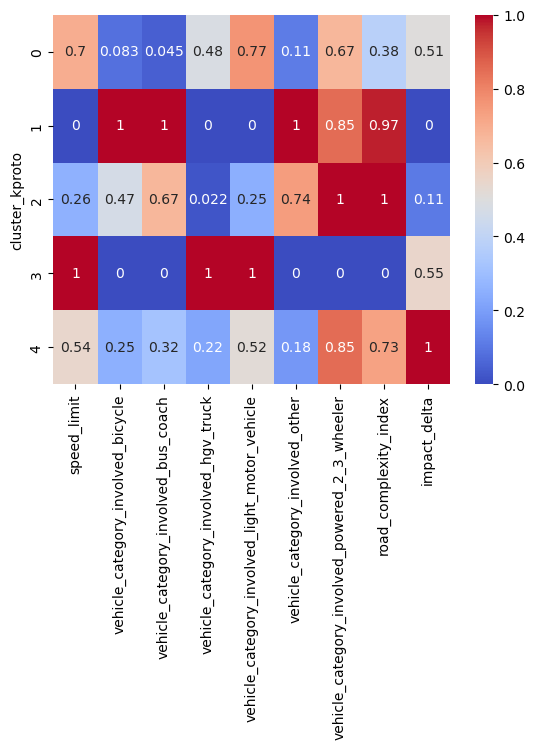

In [25]:
import seaborn as sns

sns.heatmap(numeric_norm, annot=True, cmap="coolwarm")
plt.show()

Evaluate silhouette score

## Hierarchical Clustering with Gower Distance

For datasets containing both numerical and categorical features, **Gower distance** provides a way to compute similarities between mixed-type records.  
We can then apply **Agglomerative Hierarchical Clustering** using this distance matrix.

Since hierarchical clustering can be computationally expensive on large datasets, a sample of 1,000 records is taken.

In [ ]:
pip install gower

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gower
from sklearn.cluster import AgglomerativeClustering

df_sample = df.sample(1000)
gower_dist = gower.gower_matrix(df_sample)

n_clusters = 5

model = AgglomerativeClustering(
    n_clusters,
    metric='precomputed',
    linkage='average'
)

labels = model.fit_predict(gower_dist)
df_sample["cluster_hierarchical"] = labels


## Plot dendrogram

To better understand the hierarchical structure of the data, it can be visualized using a **dendrogram**.  
Since the Gower distance for mixed-type featureswas already computed, it is converted to a condensed form and `linkage` is applied to generate the hierarchical clustering tree.

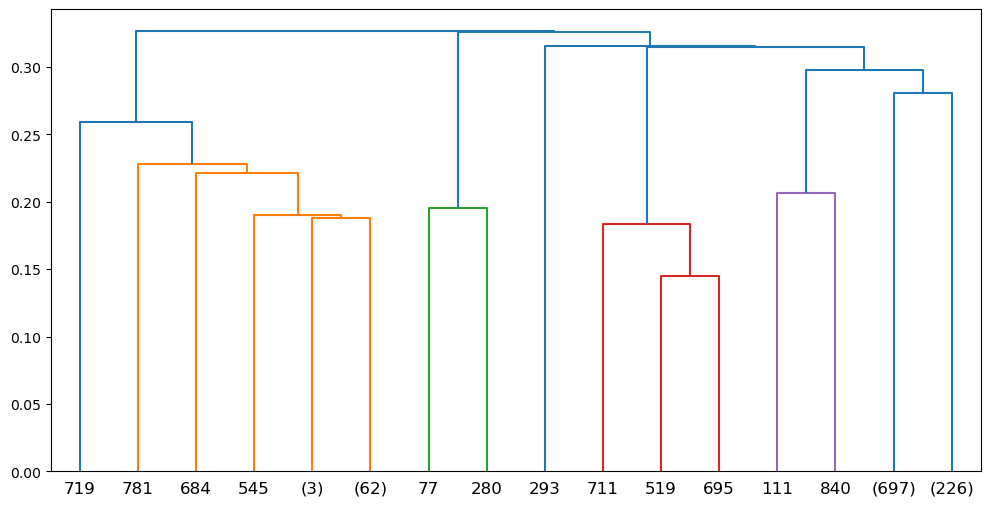

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

from scipy.spatial.distance import squareform
gower_condensed = squareform(gower_dist, checks=False)

Z = linkage(gower_condensed, method='average')

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='level', p=5)
plt.show()

In [ ]:
pip install hdbscan

     -------------------------------------- 811.2/811.2 kB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN(
    metric='precomputed',
    cluster_selection_method='eom'
)
labels_hdb = clusterer.fit_predict(gower_dist.astype("float64"))
df_sample["cluster_hdb"] = labels_hdb

In [ ]:
pip install umap-learn

  Using cached umap_learn-0.5.9.post2-py3-none-any.whl (90 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
  Using cached numba-0.60.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached llvmlite-0.43.0-cp39-cp39-win_amd64.whl (28.1 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [ ]:
clusterer = hdbscan.HDBSCAN(
    metric='euclidean',
    cluster_selection_method='eom'
)

preprocesss = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols + ord_cols)
    ]
)
pipeline = Pipeline([
    ("prep", preprocess),
    ("hdbscan", clusterer)
])

labels = pipeline.fit_predict(df)
df_final["cluster_hdb"] = labels

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MemoryError: Unable to allocate 117. GiB for an array with shape (15751505025,) and data type int64

In [ ]:
import umap

reducer = umap.UMAP(metric='precomputed')
umap_coords = reducer.fit_transform(gower_dist)

labels_to_plot = clusterer.fit_predict(umap_coords)

AttributeError: module 'umap' has no attribute 'UMAP'

## Evaluate clustering algorithms

To assess the quality of our clustering, the **Silhouette Score** is used, which measures how similar each observation is to its own cluster compared to other clusters.  

- Values close to **1** indicate well-separated, cohesive clusters.  
- Values near **0** suggest overlapping clusters.  
- Negative values indicate possible misassignments.

The Silhouette Score is computed for each algorithm:

- **K-Means** and **K-Prototypes**: use the preprocessed numeric/categorical matrix.  
- **Hierarchical clustering**: use the Gower distance matrix.  
- **HDBSCAN**: use the Gower distance matrix

This allows a quick comparison of which clustering method best captures the structure of mixed-type accident data.

In [ ]:

from evaluation import evaluate_clustering

evaluate_clustering(df_prepared, df_final["cluster_kproto"])

ModuleNotFoundError: No module named 'models'